### Student Information
Name: 簡子霖

Student ID: M1406785

GitHub ID: kevinchien920819

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# install wordcloud if not installed
!uv add wordcloud
!uv sync

Resolved 169 packages in 7ms
Audited 158 packages in 1ms
Resolved 169 packages in 8ms
Audited 158 packages in 1ms


In [2]:
# import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import data_mining_helpers as dmh

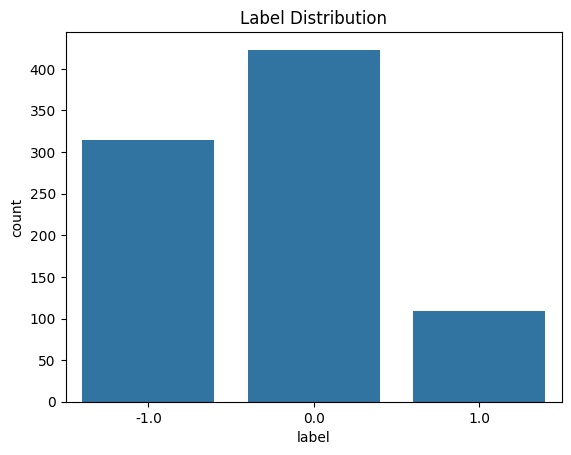

In [3]:

df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

# 只保留必要欄位
data = df[['text', 'label']].dropna()

# 檢查情感標籤分布
sns.countplot(x='label', data=data)
plt.title("Label Distribution")
plt.show()


In [10]:
data['clean_text'] = data['text'].apply(dmh.clean_text)
data


,text,label,clean_text
0,Calls on retards,-1.0,calls on retards
1,Stunt as in like why did they even make a big ...,0.0,stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.,0.0,seeing lots of red in the ticker
3,Vision Marine Technologies Inc. is rewriting t...,1.0,vision marine technologies inc is rewriting th...
4,He didn’t say thank you.,-1.0,he didnt say thank you
...,...,...,...
842,Invest now it is going to shoot up tomorrow,1.0,invest now it is going to shoot up tomorrow
843,Where can I read this?,0.0,where can i read this
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,upgrades downgrades\n\n stock analyst recommen...
845,i sold my puts so i expect cheeto to declare w...,-1.0,i sold my puts so i expect cheeto to declare w...


In [16]:
# we prepare three different label text for the wordcloud
positive_text = " ".join(data[data['label']==1]['clean_text'])
negative_text = " ".join(data[data['label']==-1]['clean_text'])
neutral_text  = " ".join(data[data['label']==0]['clean_text'])

Text(0.5, 1.0, 'Positive WordCloud')

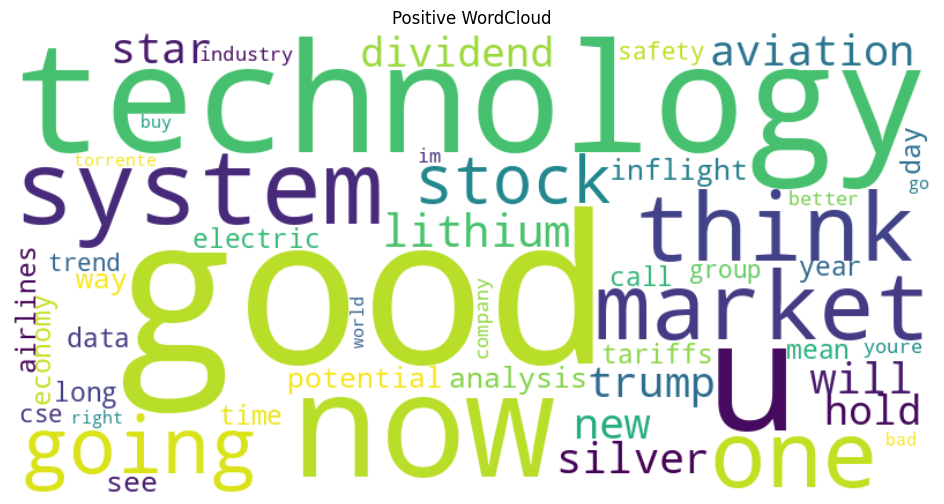

In [34]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', max_words=50, collocations=False).generate(positive_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive WordCloud")

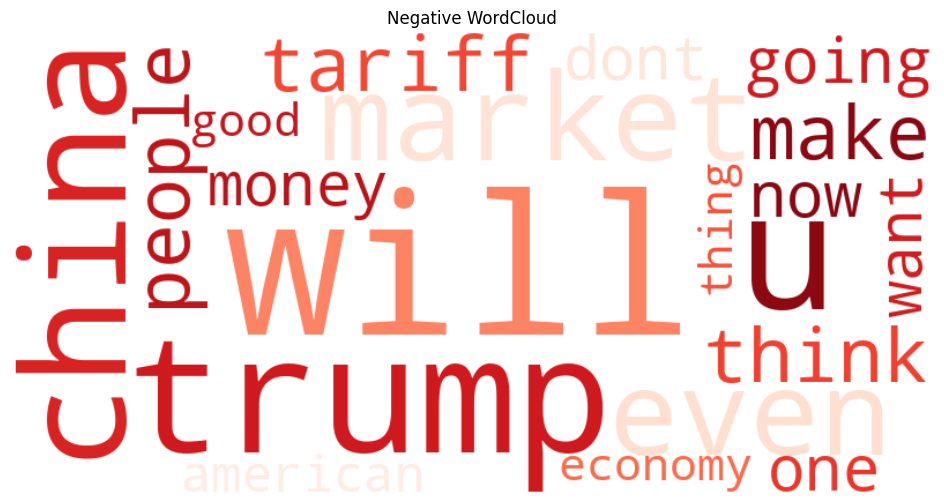

In [39]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap="Reds", max_words=20, collocations=False).generate(negative_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative WordCloud")
plt.show()

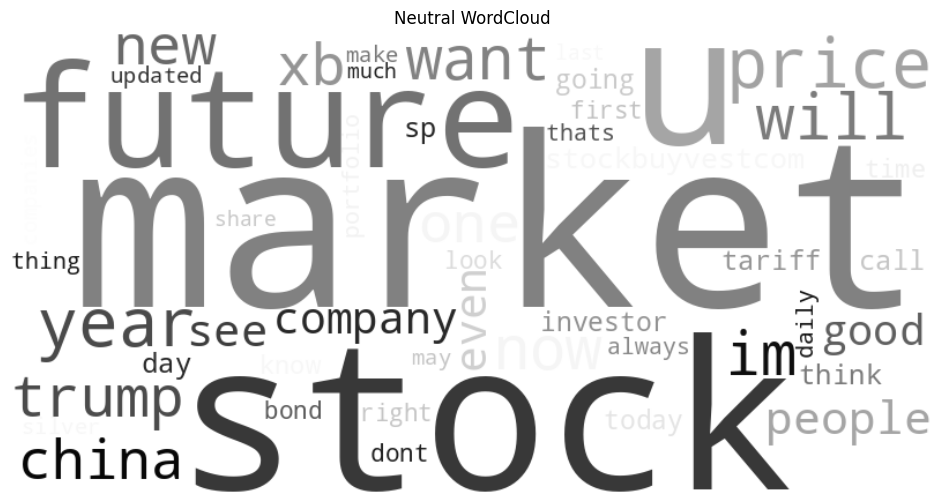

In [38]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap="Grays", max_words=50, collocations=False).generate(neutral_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral WordCloud")
plt.show()

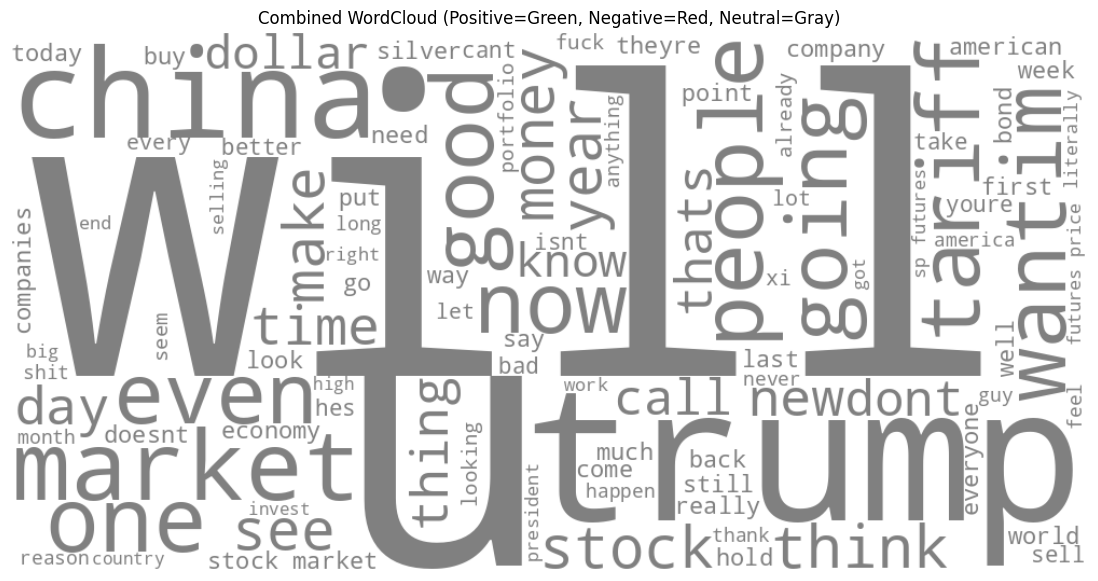

In [20]:
# 合併成一個大字典 (key=詞, value=類別)
from collections import defaultdict
word_category = defaultdict(str)

for word in positive_text.split():
    word_category[word] = "pos"
for word in negative_text.split():
    word_category[word] = "neg"
for word in neutral_text.split():
    word_category[word] = "neu"
    
all_text = positive_text + " " + negative_text + " " + neutral_text

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    category = word_category.get(word, "neu")
    if category == "pos":
        return "green"   # 正向 = 綠色
    elif category == "neg":
        return "red"     # 負向 = 紅色
    else:
        return "gray"    # 中立 = 灰色
# 產生 WordCloud
wc = WordCloud(
    width=1000, 
    height=500, 
    background_color="white",
    max_words=100 # TODO: 調整顯示的最大詞數
).generate(all_text)

# 套用顏色
plt.figure(figsize=(15,7))
plt.imshow(wc.recolor(color_func=color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.title("Combined WordCloud (Positive=Green, Negative=Red, Neutral=Gray)")
plt.show()

# Phase 2

In [9]:
### Begin Assignment Here